# CS136 Project

The market is represented by a wholesaler-retailer pair where downstream demand is known. Without integration the wholesaler posts a price and the retailer decides how much quantity to purchase at that price.  We assume that both the retailer and the supplier have market power, which gives us the shape of the marginal revenue for the wholesaler and the retailer.

## Double marginalization

In [38]:
def demand_price_function(q):
    return 1200 - 100 * q

def retail_marginal_revenue(q):
    return 1200 - 350 * q

def wholesale_marginal_revenue(q):
    return 1200 - 600 * q

def marginal_cost(q):
    return 400 + 0 * q

def DM_wholesale_demand():
    func = lambda q : wholesale_marginal_revenue(q) - marginal_cost(q)
    return fsolve(func, 0)[0]

def DM_retail_price():
    return demand_price_function(DM_wholesale_demand())

def INTEGRATED_wholesale_demand():
    func = lambda q : retail_marginal_revenue(q) - marginal_cost(q)
    return fsolve(func, 0)[0]

def INTEGRATED_retail_price():
    return demand_price_function(INTEGRATED_wholesale_demand())

def DM_wholesale_price(): # pick random. More realisitc solution?
    return np.random.uniform(marginal_cost(DM_wholesale_demand()), DM_retail_price())

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def INTEGRATED_total_profit():
    x = q[q <= INTEGRATED_wholesale_demand()]
    irp = INTEGRATED_retail_price()
    mc0 = marginal_cost(x)[0]
    mcn = marginal_cost(x)[-1]
    return PolyArea([x[0], x[0], x[-1], x[-1]], 
                    [mc0, irp, irp, mcn])

def DM_total_profit():
    x = q[q <= DM_wholesale_demand()]
    dmrp = DM_retail_price()
    mc0 = marginal_cost(x)[0]
    mcn = marginal_cost(x)[-1]
    return PolyArea([x[0], x[0], x[-1], x[-1]], 
                    [mc0, dmrp, dmrp, mcn])
    

### Without vertical integration

In [680]:
from scipy.optimize import fsolve, minimize, brentq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
q = np.arange(0, 7, 0.01)

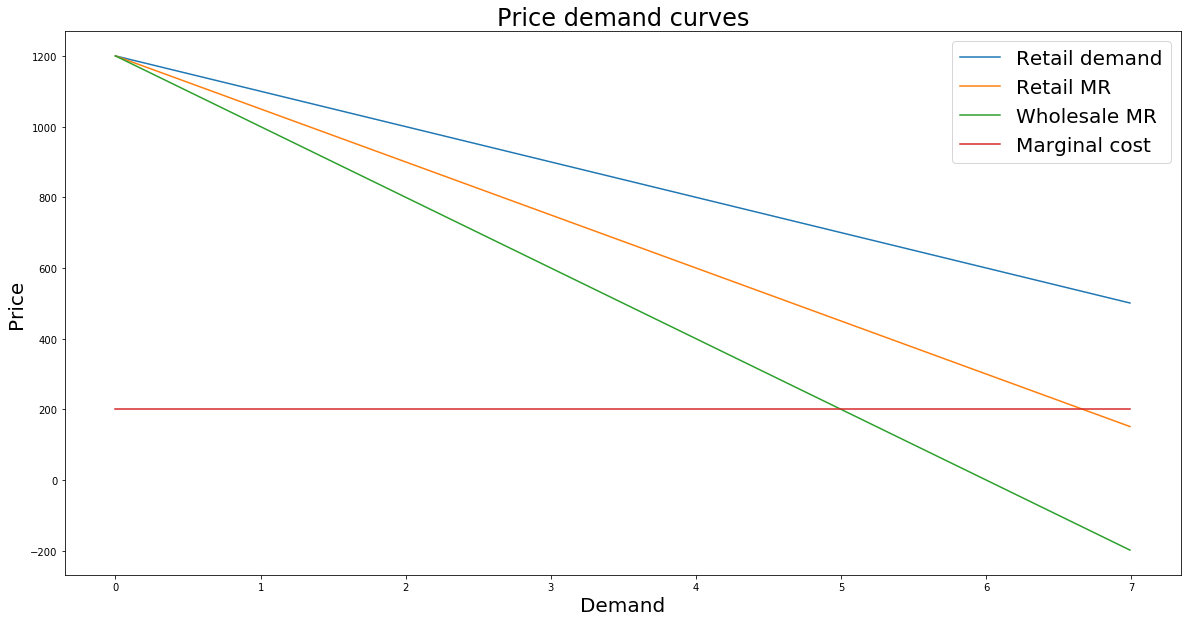

In [15]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Price demand curves', size=24)
ax.set_xlabel('Demand', size=20)
ax.set_ylabel('Price', size=20)
ax.plot(q, demand_price_function(q), label = 'Retail demand')
ax.plot(q, retail_marginal_revenue(q), label = 'Retail MR')
ax.plot(q, wholesale_marginal_revenue(q), label = 'Wholesale MR')
ax.plot(q, marginal_cost(q), label = 'Marginal cost')
ax.legend(fontsize = 20)

If the wholesaler and the retailer are separate entities, the wholesaler will produce a quantity at the point where its marginal revenue curve intersects its marginal cost curve. The retailer will buy this quantity and sell it at the retail price.

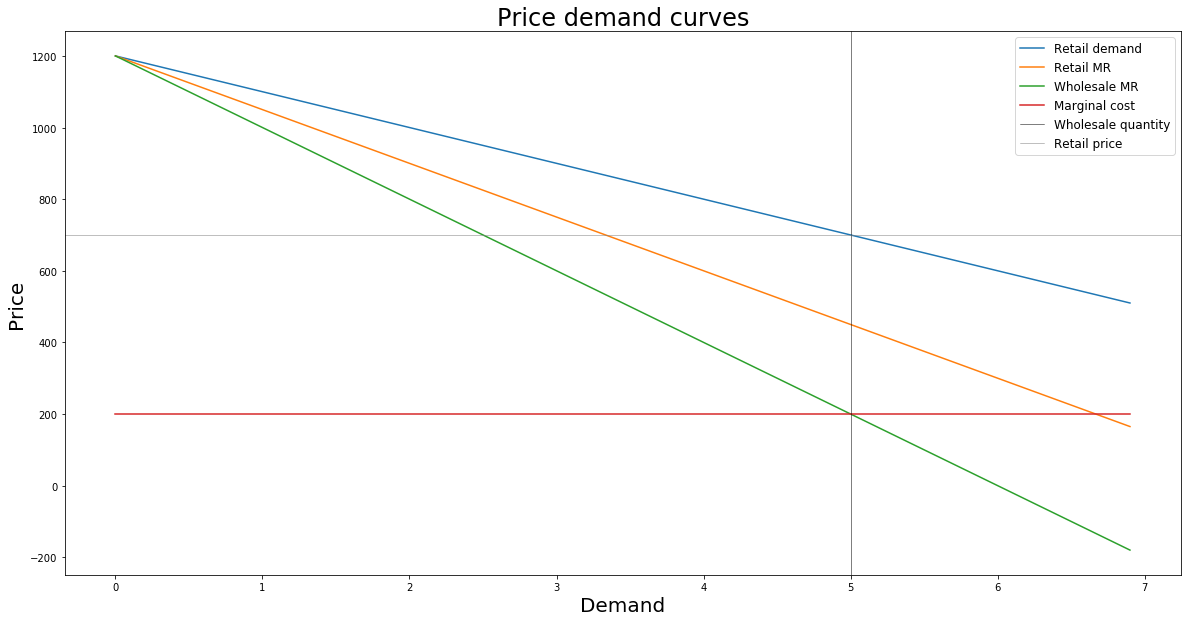

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Price demand curves', size=24)
ax.set_xlabel('Demand', size=20)
ax.set_ylabel('Price', size=20)
ax.plot(q, demand_price_function(q), label = 'Retail demand')
ax.plot(q, retail_marginal_revenue(q), label = 'Retail MR')
ax.plot(q, wholesale_marginal_revenue(q), label = 'Wholesale MR')
ax.plot(q, marginal_cost(q), label = 'Marginal cost')
ax.axvline(DM_wholesale_demand(), label = 'Wholesale quantity', color = 'black', lw = 0.5)
ax.axhline(DM_retail_price(), label = 'Retail price', color = 'grey', lw = 0.5)
ax.legend(fontsize = 12)

### With vertical integration

The marginal revenue curve that is taken into account when deciding what quantity to produce is the retail marginal revenue instead of the wholesale marignal revenue.

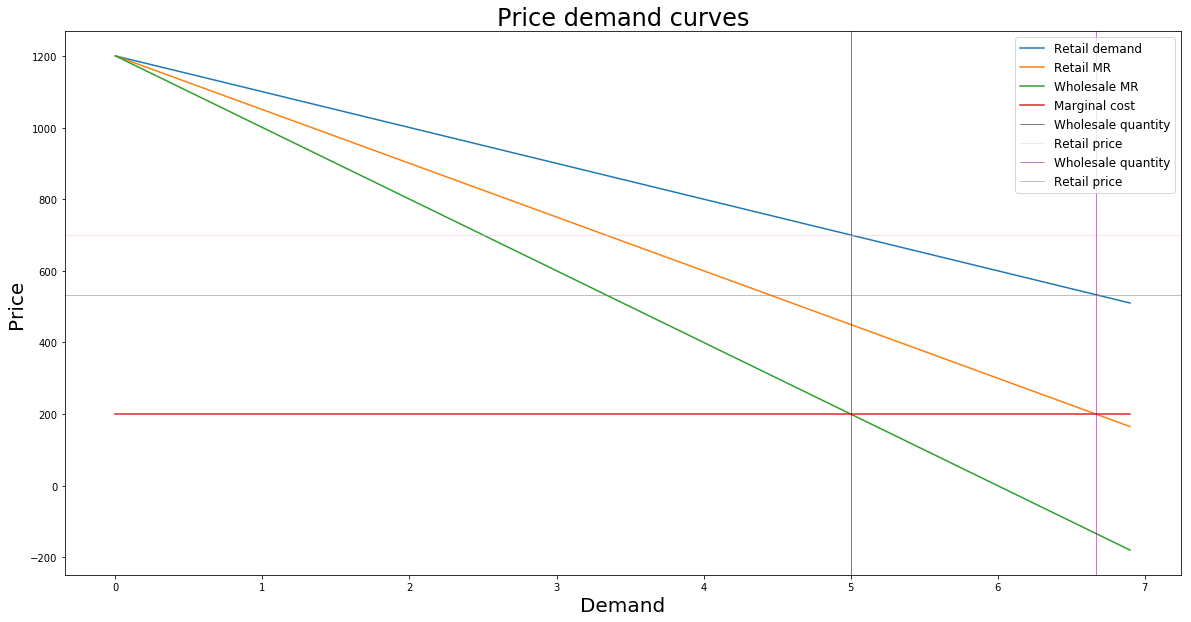

In [11]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Price demand curves', size=24)
ax.set_xlabel('Demand', size=20)
ax.set_ylabel('Price', size=20)
ax.plot(q, demand_price_function(q), label = 'Retail demand')
ax.plot(q, retail_marginal_revenue(q), label = 'Retail MR')
ax.plot(q, wholesale_marginal_revenue(q), label = 'Wholesale MR')
ax.plot(q, marginal_cost(q), label = 'Marginal cost')
ax.axvline(DM_wholesale_demand(), label = 'Wholesale quantity', color = 'black', lw = 0.5)
ax.axhline(DM_retail_price(), label = 'Retail price', color = 'pink', lw = 0.5)
ax.axvline(INTEGRATED_wholesale_demand(), label = 'Wholesale quantity', color = 'purple', lw = 0.5)
ax.axhline(INTEGRATED_retail_price(), label = 'Retail price', color = 'grey', lw = 0.5)
ax.legend(fontsize = 12)

### Analysis for different actors

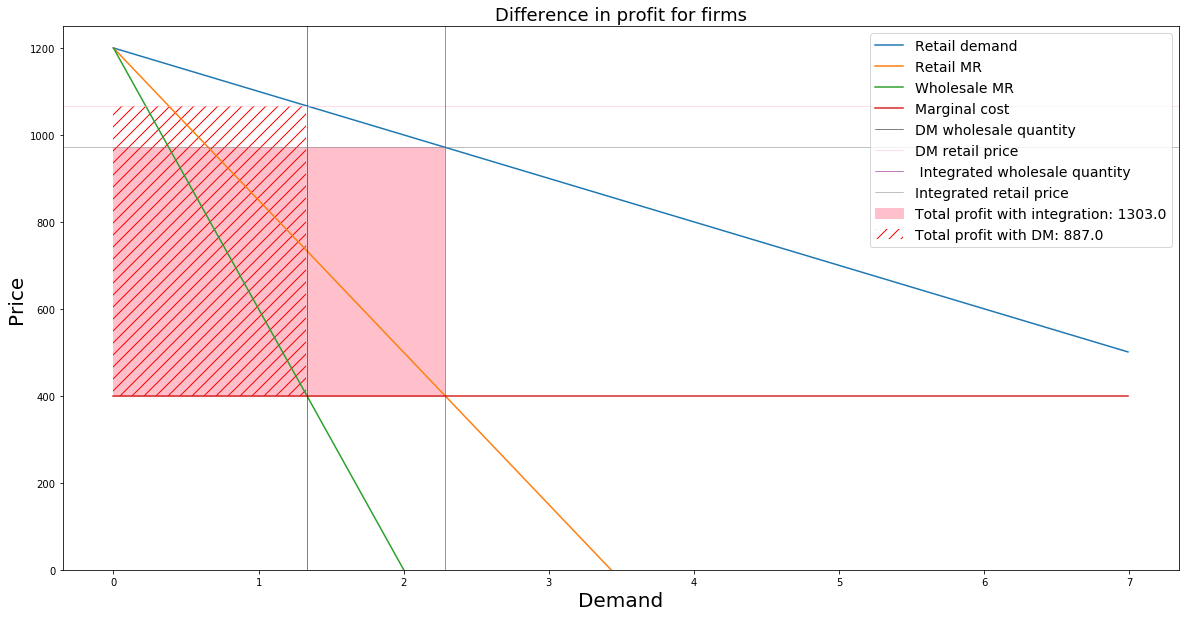

In [39]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_ylim(0, 1250)
ax.set_title('Difference in profit for firms', size=18)
ax.set_xlabel('Demand', size=20)
ax.set_ylabel('Price', size=20)
ax.plot(q, demand_price_function(q), label = 'Retail demand')
ax.plot(q, retail_marginal_revenue(q), label = 'Retail MR')
ax.plot(q, wholesale_marginal_revenue(q), label = 'Wholesale MR')
ax.plot(q, marginal_cost(q), label = 'Marginal cost')
ax.axvline(DM_wholesale_demand(), label = 'DM wholesale quantity', color = 'black', lw = 0.5)
ax.axhline(DM_retail_price(), label = 'DM retail price', color = 'pink', lw = 0.5)
ax.axvline(INTEGRATED_wholesale_demand(), label = ' Integrated wholesale quantity', color = 'purple', lw = 0.5)
ax.axhline(INTEGRATED_retail_price(), label = 'Integrated retail price', color = 'grey', lw = 0.5)

#dmwsp = DM_wholesale_price()
#ax.axhline(dmwsp, label = 'DM wholesale price', color = 'yellow', lw = 1)

x = q[q <= INTEGRATED_wholesale_demand()]
ax.fill_between(x = x, 
                y1 = marginal_cost(x) , 
                y2 = np.repeat(INTEGRATED_retail_price(), len(x)), 
                color = 'pink',
                label = 'Total profit with integration: ' + str(np.round(INTEGRATED_total_profit())))

xDM = q[q <= DM_wholesale_demand()]

ax.fill_between(x = xDM, 
                y1 = marginal_cost(xDM) , 
                y2 = np.repeat(DM_retail_price(), len(xDM)), 
                label = 'Total profit with DM: ' + str(np.round(DM_total_profit())),
                facecolor="none", hatch='//', edgecolor="red", lw = 0)

# ax.fill_between(x = xDM, 
#                y1 = np.repeat(dmwsp, len(xDM)), 
#                y2 = np.repeat(DM_retail_price(), len(xDM)), 
#                label = 'Retail profit wit DM',
#                facecolor="none", hatch='//', edgecolor="blue", lw = 0)

ax.legend(fontsize = 14)

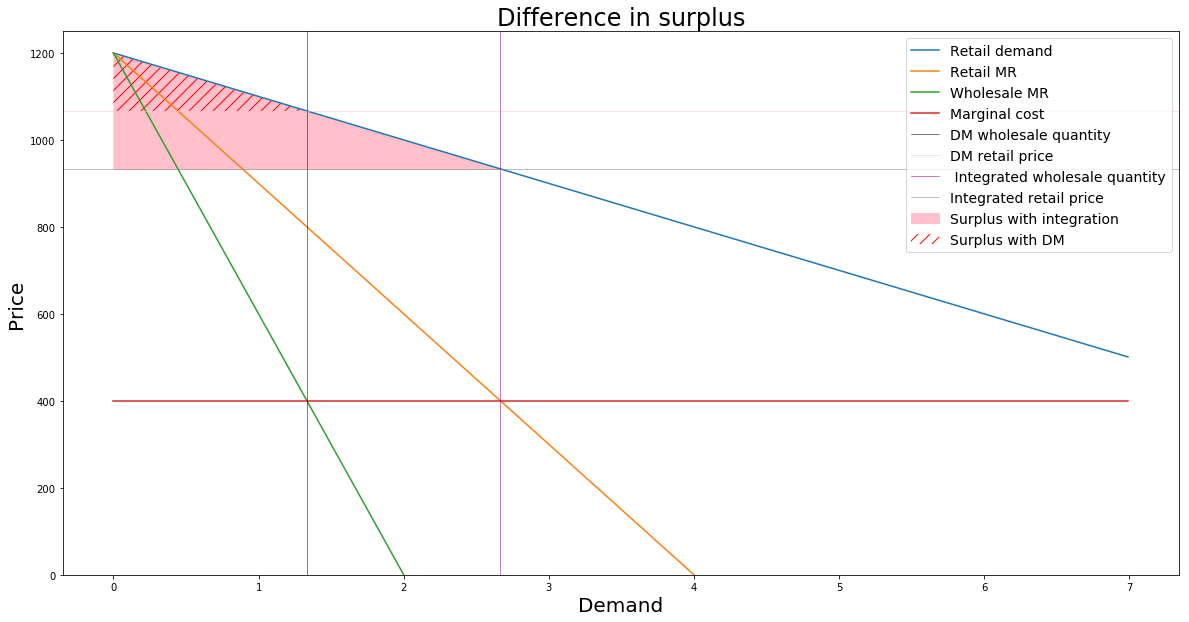

In [36]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_ylim(0, 1250)
ax.set_title('Difference in surplus', size=24)
ax.set_xlabel('Demand', size=20)
ax.set_ylabel('Price', size=20)
ax.plot(q, demand_price_function(q), label = 'Retail demand')
ax.plot(q, retail_marginal_revenue(q), label = 'Retail MR')
ax.plot(q, wholesale_marginal_revenue(q), label = 'Wholesale MR')
ax.plot(q, marginal_cost(q), label = 'Marginal cost')
ax.axvline(DM_wholesale_demand(), label = 'DM wholesale quantity', color = 'black', lw = 0.5)
ax.axhline(DM_retail_price(), label = 'DM retail price', color = 'pink', lw = 0.5)
ax.axvline(INTEGRATED_wholesale_demand(), label = ' Integrated wholesale quantity', color = 'purple', lw = 0.5)
ax.axhline(INTEGRATED_retail_price(), label = 'Integrated retail price', color = 'grey', lw = 0.5)

x = q[q <= INTEGRATED_wholesale_demand()]
ax.fill_between(x = x, 
                y1 = np.repeat(INTEGRATED_retail_price(), len(x)), 
                y2 = demand_price_function(x),
                color = 'pink',
                label = 'Surplus with integration')

xDM = q[q <= DM_wholesale_demand()]

ax.fill_between(x = xDM, 
                y1 = np.repeat(DM_retail_price(), len(xDM)), 
                y2 = demand_price_function(xDM), 
                label = 'Surplus with DM',
                facecolor="none", hatch='//', edgecolor="red", lw = 0)

ax.legend(fontsize = 14)

Demand uncertainty is an important component of the agency conflict and how risks are shared, but you may not need that to make this an interesting problem. 

Interesting problem - I'm not sure that I buy the high supplier payoff when they undersupply units in a single buyer-single supplier case - this is more feasible in a situation with many substitutable buyers and suppliers. How do you plan to find the equilibria? The paper cited uses techniques outside the scope of this course - if you feel prepared to implement them, this could be an interesting project. If not, you need to think about how you would simplify this problem in a way that still allows you to draw conclusions from your simulations.





## Multiple wholesalers

In the multiple suppliers context might there be a way to introduce an auction into your model, as a way to capture the effect of competition? 

There's quite a lot of work on prisoners dilemma style games playing out in a larger population, e.g. Martin Nowak has done a lot on this, I think. 

You might think about whether you can bring some of this into the present context. One thing to watch out for is that there's an essentially unlimited number of folk theorems even in two player, repeated games (although a pretty well understood characterization of the kinds of payoffs that can be achieved). 

So you will need to be aware of this, and think about how you will handle it. last advice: don't assume it will be easier to study repeated games with more than two players, I think you will want to use some understand theory , e.g. Martin Nowak style stuff, to get traction on this given the time frame of this class paper.

<table>
    <tr>
        <td></td><td>C: cooperative pricing</td><td>D: high pricing</td>
    </tr>
    <tr>
        <td>C: cooperative supply</td><td>something that sums to 1419</td><td>(0, )</td>
    </tr>
        <tr>
        <td>D: undersupply</td><td>(same as right, 0)</td><td>something that sums to 887</td>
    </tr>
</table>


In [239]:
A=100

def Q(P):
    return A - P

def optimal_retail_price(wp):
        return 0.5 * (A + wp)

class Retailer:
    
    def __init__(self):
        self.retail_price = None
        self.total_profit = 0
        
    def set_retail_price(self, a):
        self.retail_price = a
        
    def profit(self, wholesale_price, retail_price):
        return Q(retail_price) * (retail_price - wholesale_price)
    
    def maximize_profit(self, wholesale_price):
        self.set_retail_price(0.5 * (A + wholesale_price))
        
    def collect_profit(self, p):
        self.total_profit += p
        
    
class Supplier:
    
    def __init__(self, cost=25):
        self.wholesale_price = None
        self.cost = cost
        self.total_profit = 0
        
    def set_wholesale_price(self, a):
        self.wholesale_price = a
        
    def profit(self, wholesale_price, retail_price):
        return Q(retail_price) * (wholesale_price - self.cost)
    
    def maximize_profit(self):
        self.set_wholesale_price(0.5*(A + self.cost))
        
    def collect_profit(self, p):
        self.total_profit += p

In [297]:
retailer = Retailer()
supplier = Supplier()

In [299]:
nrounds = 1000
scale = 5

for i in range(nrounds):
    supplier.maximize_profit()
    retailer.maximize_profit(supplier.wholesale_price)
    
    demand = np.random.normal(loc = Q(retailer.retail_price), scale = scale ) #* np.sqrt(Q(retailer.retail_price)))
    
    supplier.collect_profit( demand * (supplier.wholesale_price - supplier.cost) )
    retailer.collect_profit( demand * (retailer.retail_price - supplier.wholesale_price) )
    
print(supplier.total_profit/nrounds, retailer.total_profit/nrounds)

1406.8770572153999 703.4385286076999


## Multiple suppliers

We integrate an auction into the model to capture the effect of competition. The idea is that the suppliers bid on a wholesale price according to their model for demand to be allocated the space they want in the warehouse.

In a model with multiple suppliers and one retailer, we have:

$$ Q_1 = \alpha \cdot S_{1}^{\gamma} P_2^{\epsilon_{2}} P_1^{\mu_1} 
\textrm{ and }
Q_2 = \alpha \cdot S_{2}^{\gamma} P_1^{\epsilon_{1}} P_2^{\mu_2}
$$

(retailer's demand for product $i$ and $k$, respectively)

Find the value of suppliers 1 and 2 for space in the warehouse.
$$\Pi_{S1} = (W_1 - C_1) Q_1 = \alpha \cdot (W_1 - C_1) \cdot S_{1}^{\gamma} P_2^{\epsilon_{2}} P_1^{\mu_1} $$

If supplier 1 is truthful, they bid $(S_1, \Pi_{S_1})$. The retailer sets $P_1$ and $P_2$ according to the other variables.

How can the retailer design an auction such that their profit is also maximized?

$$
\Pi_R = Q_1(P_1-W_1) + Q_2(P_2 - W_2)
$$

Should suppliers bid a wholesale price?

Given bids W_1, W_2, the retailer sets the prices P_1, P_2 to maximize profit. P_1 and P_2 are functions of W_1 W_2

$$
\Pi_R = \alpha S^\gamma P_2^{\epsilon_2}P_1^{\mu_1}(P_1-W_1) + \alpha (1-S)^\gamma P_1^{\epsilon_1}P_2^{\mu_2}(P_2-W_2)
$$


$$
\frac{\partial \Pi_R}{\partial P_1} =  \frac{\partial \Pi_R}{\partial P_2} = 0
$$

implies 

$$
\alpha P_2^{\epsilon_2}P_1^{\mu_1} (\mu_1+1)- \alpha \mu_1 P_2^{\epsilon_2}P_1^{\mu_1-1} W_1 + \alpha \epsilon_1 P_1^{\epsilon_1-1} P_2^{\mu_2}(P_2-W_2) =0
$$

and

$$
\alpha P_1^{\epsilon_1}P_2^{\mu_2} (\mu_2+1) - \alpha P_1^{\epsilon_1}P_2^{\mu_2-1} W_2 \mu_2 + \alpha \epsilon_2 P_2^{\epsilon_2-1} P_1^{\mu_1}(P_1-W_1) =0
$$

In [684]:
def diffRetailProfit_diffP1(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s):
    dp = (1-s)**gamma * epsilon1 * p1**(epsilon1-1) * (p2-w2) * p2**mu2 + s**gamma * mu1 * p2**(epsilon2-1) * (p1-w1) * p1**mu1 + s**gamma * p2**epsilon2 * p1**mu1
    return dp

def diffRetailProfit_diffP2(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s):
    dp = s**gamma * epsilon2 * p2**(epsilon2-1) * (p1-w1) * p1**mu1 + (1-s)**gamma * mu2 * p1**(epsilon1-1) * (p2-w2) * p2**mu2 + (1-s)**gamma * p1**epsilon1 * p2**mu2
    return dp

def diffRetailProfit_diffAlloc(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s):
    return - (p1**epsilon1 * (p2-w2) * p2**mu2) * gamma * (1-s)**(gamma-1) + (p2**epsilon2 * (p1-w1) * p1**mu1) * gamma * s**(gamma-1)

def diffRetailProfit(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s):
    return [diffRetailProfit_diffP1(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s), 
            diffRetailProfit_diffP2(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s), 
            diffRetailProfit_diffAlloc(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s)]

def diffWholesaleProfit1_diffW1(cost1):
    
    return

def diffWholesaleProfit2_diffW2(cost2):
    
    return

def retailProfit(gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2, s):
    return (1-s)**gamma * p1**epsilon1 * (p2-w2) * p2**mu2 + s**gamma * p2**epsilon2 * (p1-w1) * p1**mu1
    
def maxRetailProfit(gamma, epsilon1, epsilon2, mu1, mu2, w1, w2):
    func = lambda q : diffRetailProfit(gamma, epsilon1, epsilon2, mu1, mu2, q[0], q[1], w1, w2, q[2])
    return fsolve(func, [w1 + np.random.normal(0, 0.001) , w2 + np.random.normal(0, 0.001), 0.5])

In [701]:
epsilon1 = -1.1
epsilon2 = -1.7
gamma = -1.2
mu1 = - 4.6
mu2 = - 5.1

w1 = 1
w2 = 2

q = np.arange(3, 10, 0.1).astype(float)

In [702]:
maxRetailProfit(gamma, epsilon1, epsilon2, mu1, mu2, w1, w2)

array([1.41835378, 2.17161083, 0.74029055])

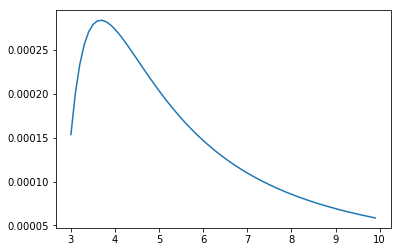

In [538]:
plt.plot(q, profit(s, gamma, epsilon1, epsilon2, mu1, mu2, q, p2, w1, w2))

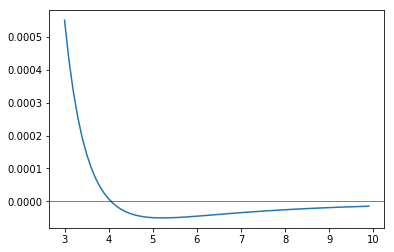

In [545]:
plt.plot(q, diffprofit_diffp1(s, gamma, epsilon1, epsilon2, mu1, mu2, q, p2, w1, w2))
plt.axhline(0, color='black', lw = 0.5)

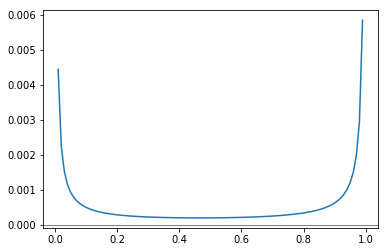

In [558]:
q=np.arange(0.01, 1, 0.01)
plt.plot(q, profit(q, gamma, epsilon1, epsilon2, mu1, mu2, p1, p2, w1, w2))
plt.axhline(0, color='black', lw = 0.5)